In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx"
data = pd.read_excel(url, index_col=0, skiprows=1)
data

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...
2011-02-16,0.008599,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
2011-02-17,0.009310,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
2011-02-18,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938


# [연습문제 14-1]

1. PCA 전 데이터를 먼저 탐색.

(1-1. 데이터 시계열, 1-2. 상관계수 행렬, 1-3. 공분산 행렬 시각화)

2. 데이터의 공분산 행렬 계산.
(여기서 얻는 공분산 행렬은 특징 사이의 공분산 행렬임.)

3. 해당 공분산 행렬의 고윳값 분해 구하기.

4. 고윳값을 크기에 따라 내림차순으로 정렬하고 그에 따라 고유벡터를 정렬.
(PCA의 고윳값을 잠재 요인 점수 라고도 함.)

5. 모든 데이터 특징의 가중 결합으로 '구성 요소 점수'를 계산
(여기서 고유벡터는 가중치가 됨, 가장 큰 고윳값과 관련된 고유벡터가 '가장 중요한' 구성 요소  = 분산)

6. 해석을 위해 고윳값을 분산 비율로 변환

7. 구성 요소 시계열의 분산(np.var 사용)은 해당 구성 요소와 연관된 고윳값과 일치함.

8. 주성분(증권거래소 가중치 조합) 1과 2 사이의 상관관계는 0, 직교임

9. 처음 두 구성 요소에 대한 고유벡터 가중치를 시각화.
(가중치는 각 변수가 구성 요소에 기여하는 정도를 나타냄)

<Figure size 1500x600 with 0 Axes>

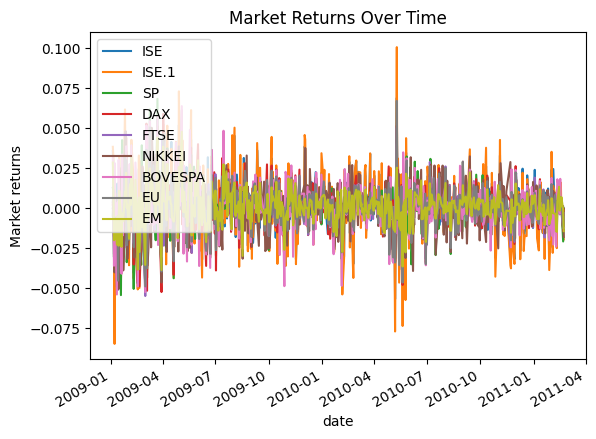

In [5]:
#1-1
plt.figure(figsize=(15, 6))
data.plot(ylabel='Market returns')
plt.title('Market Returns Over Time')
plt.show()


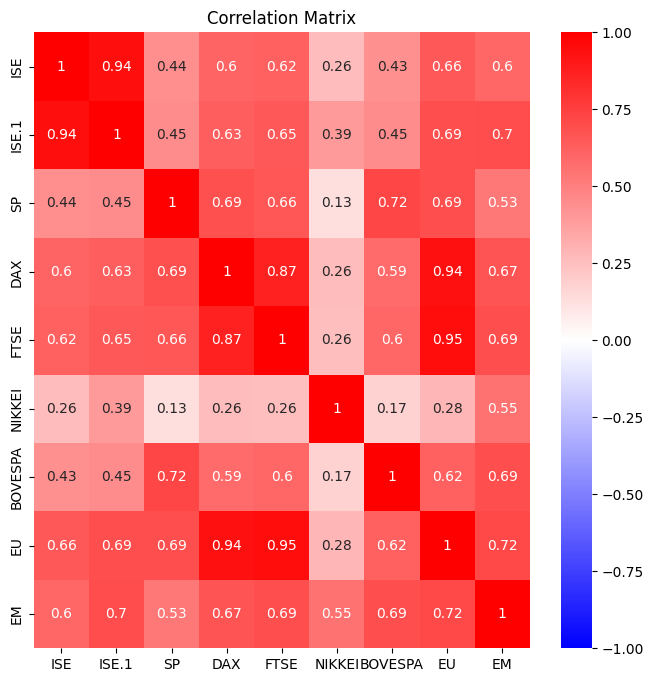

In [6]:
#1-2
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, cmap='bwr', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


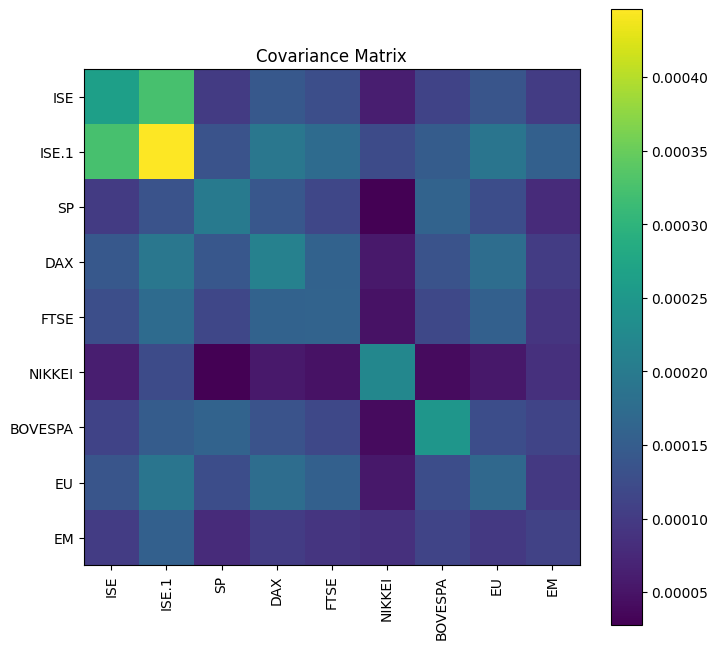

In [8]:
#1-3
X = data.values
X_centered = X - np.mean(X, axis=0)

# 공분산 행렬 계산
cov_matrix = np.cov(X_centered, rowvar=False)

plt.figure(figsize=(8, 8))
plt.imshow(cov_matrix, cmap='viridis')
plt.colorbar()
plt.title('Covariance Matrix')
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.yticks(range(len(data.columns)), data.columns)
plt.show()


# [연습문제 14-2]

(1) 데이터 공분산 행렬의 SVD와 (2) 데이터 행렬 자체의 SVD를 사용하여 결과를 재현하여라.

($X^{T}X$의 고윳값은 $X$의 특잇값을 제곱한 값이며, 공분산 행렬의 보정 계수를 특잇값에 적용하여 동등성을 찾아야함.)

In [10]:
U_cov, s_cov, Vt_cov = np.linalg.svd(cov_matrix)
eigenvalues_cov = s_cov
eigenvectors_cov = U_cov

In [11]:
U_data, s_data, Vt_data = np.linalg.svd(X_centered)
eigenvalues_data = (s_data ** 2) / (X_centered.shape[0] - 1)
print('공분산 행렬의 고유값:', eigenvalues_cov[:4])
print('데이터 행렬의 고유값:', eigenvalues_data[:4])

공분산 행렬의 고유값: [0.0013006  0.00028585 0.00019503 0.00012253]
데이터 행렬의 고유값: [0.0013006  0.00028585 0.00019503 0.00012253]


# [연습문제 14-3]

수작업한 PCA를 Python의 PCA 루틴의 출력과 비교하여라.

Python에서 PCA를 시행하는 방법 : sklearn.decomposition 라이브러리 사용.

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)
print('수작업 고유값:', eigenvalues_cov[:4])
print('sklearn 고유값:', pca.explained_variance_[:4])

print('수작업 고유벡터:\n', eigenvectors_cov[:, :4])
print('sklearn 고유벡터:\n', pca.components_[:4, :].T)

수작업 고유값: [0.0013006  0.00028585 0.00019503 0.00012253]
sklearn 고유값: [0.0013006  0.00028585 0.00019503 0.00012253]
수작업 고유벡터:
 [[-0.3864847  -0.35298874 -0.33940396  0.14970844]
 [-0.52390953 -0.49823792 -0.21717495  0.1566995 ]
 [-0.27860507  0.43379401  0.0068195   0.14904863]
 [-0.34621538  0.23047826  0.00229672 -0.47869022]
 [-0.30322542  0.17721358 -0.01055111 -0.37160553]
 [-0.16781756 -0.33454308  0.87202354 -0.03928985]
 [-0.30741897  0.46063876  0.13349569  0.63828975]
 [-0.32544121  0.17416684 -0.00184435 -0.37424992]
 [-0.24111348  0.00381729  0.24336666  0.1206717 ]]
sklearn 고유벡터:
 [[ 0.3864847   0.35298874 -0.33940396  0.14970844]
 [ 0.52390953  0.49823792 -0.21717495  0.1566995 ]
 [ 0.27860507 -0.43379401  0.0068195   0.14904863]
 [ 0.34621538 -0.23047826  0.00229672 -0.47869022]
 [ 0.30322542 -0.17721358 -0.01055111 -0.37160553]
 [ 0.16781756  0.33454308  0.87202354 -0.03928985]
 [ 0.30741897 -0.46063876  0.13349569  0.63828975]
 [ 0.32544121 -0.17416684 -0.00184435 -0.37

# [연습문제 14-4]

두 개의 데이터 '스트림'으로 구성된 데이터 집합을 만들고 그 위에 주요 구성 요소를 그려라.

1. 가우스 분포로부터 두 번째 열의 크기를 0.05로 축소한 1000*2의 무작위 숫자 행렬을 생성하여라.

2. 2*2 순수회전 행렬을 생성하여라.

3. $θ = -π/6$으로 회전된 데이터와 $θ=-π/3$으로 회전된 데이터 사본 두 개를 수직으로 쌓아라.
(결과 데이터 행렬의 크기는 2000*2이다.)

4. SVD를 사용하여 PCA를 구현하여라. (특이벡터의 배율을 2로 조정)

In [13]:
x = np.hstack((np.random.randn(1000, 1), 0.05 * np.random.randn(1000, 1)))

# 회전 각도 설정
theta1 = -np.pi / 6
theta2 = -np.pi / 3

# 회전 행렬 생성
R1 = np.array([[np.cos(theta1), -np.sin(theta1)],
               [np.sin(theta1),  np.cos(theta1)]])
R2 = np.array([[np.cos(theta2), -np.sin(theta2)],
               [np.sin(theta2),  np.cos(theta2)]])

# 회전된 데이터 생성
data1 = x @ R1
data2 = x @ R2

# 데이터를 합침
X = np.vstack((data1, data2))

In [14]:
# 평균 중심화
X_centered = X - np.mean(X, axis=0)

# SVD 수행
U, s, Vt = np.linalg.svd(X_centered)

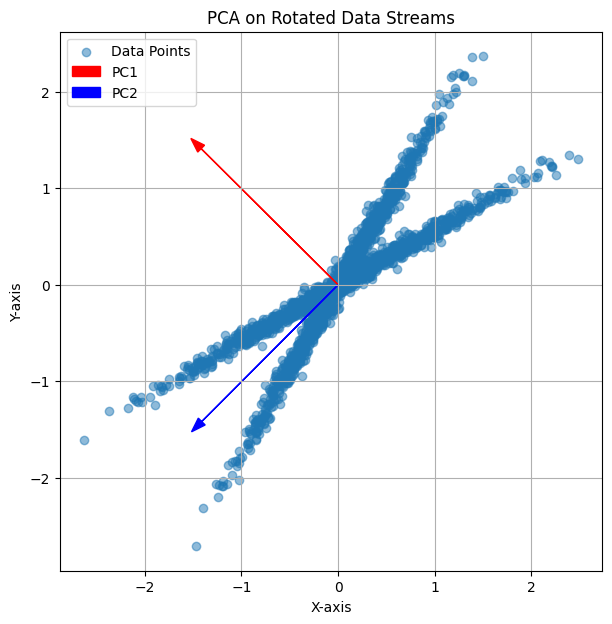

In [15]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Data Points')

# 주성분 벡터 그리기
plt.arrow(0, 0, Vt[0, 0]*2, Vt[1, 0]*2, color='r', head_width=0.1, label='PC1')
plt.arrow(0, 0, Vt[0, 1]*2, Vt[1, 1]*2, color='b', head_width=0.1, label='PC2')

plt.legend()
plt.title('PCA on Rotated Data Streams')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()

PCA는 고차원 데이터 집합의 차원을 줄이는 데 탁월함.

이는 데이터 압축, 데이터 정제 및 수치 안정성 문제를 개선함.

차원 자체는 직교성 제약으로 인해 특징 추출에 적합하지 않을 수 있음.

# [*연습문제 14-10]

**파블로 피카소의 스트라빈스키 초상화**를 3차원 행렬(640$*$430$*$3)에서 그레이 스케일(2차원)으로 변환하여 진행한다.

>이 연습 문제의 목적은 [연습문제 14-5]를 반복하는 것!
(-> 해당 문제에서는 SVD에서 4개의 '계층'을 기반으로 부드러운 잡음 이미지에 가까운 근사치를 재구성 했다.)

스트라빈스키 이미지를 사용하여 8개의 그림을 출력하여라.

>**Q. 첫 네가지 구성요소를 사용하여 이미지를 재구성하면 이전 장에서와 같이 좋은 결과를 얻을 수 있는가?**

In [16]:
from skimage import io

# 이미지 불러오기
url = 'https://berggasse19.org/wp-content/uploads/2015/05/stravinsky_picasso_wikipedia.png'
image = io.imread(url, as_gray=True)

In [17]:
U, s, Vt = np.linalg.svd(image, full_matrices=False)
k = 4
reconstructed_image = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]

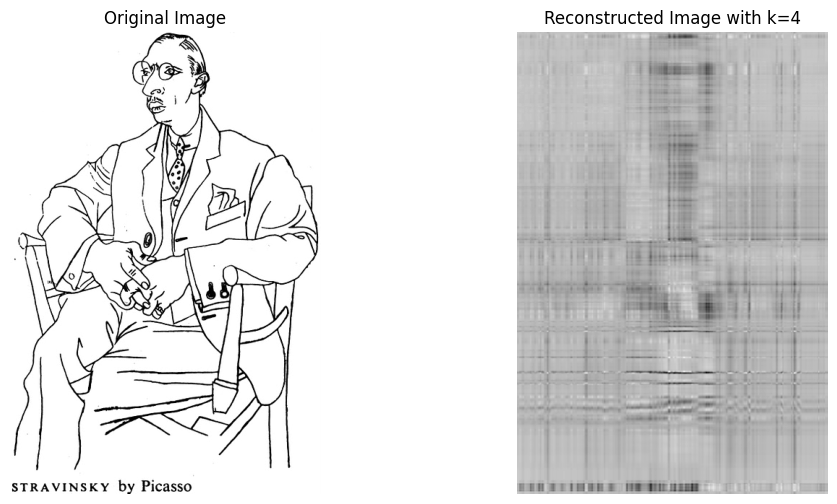

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(reconstructed_image, cmap='gray')
axes[1].set_title(f'Reconstructed Image with k={k}')
axes[1].axis('off')

plt.show()

# [*연습문제 14-11]

>A. **응 아니다.**
(계수-4 근사치는 원본 이미지와 매우 닮지 않았다.)

낮은 계수 근사치가 매우 정확하도록 더 많은 계층을 사용하여 이미지를 재구성한 다음 얻어지는 압축량을 계산하는 것이 목적이다.

1. 1-1.원본 이미지, 1-2. 재구성된 이미지, 1-3 원본과 근사치 간의 제곱 차이인 오류 맵
을 보여주는 세가지 그림을 생성하여라. (K=80 말고 다른 수를 쓰도록 할 것.)

2. 원본 이미지에 사용된 바이트 수 대비 낮은 계수 근사값이 사용한 바이트 수의 백분율인 압축 비율을 계산하여라. (교재에는 K=80에 대한 결과가 나와있음.)

(낮은 계수 근사치를 사용하면 전체 이미지나 전체 SVD 행렬을 저장할 필요가 없다는 점에 유의할 것.)

In [19]:
k = 80
reconstructed_image = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]
error_map = (image - reconstructed_image) ** 2

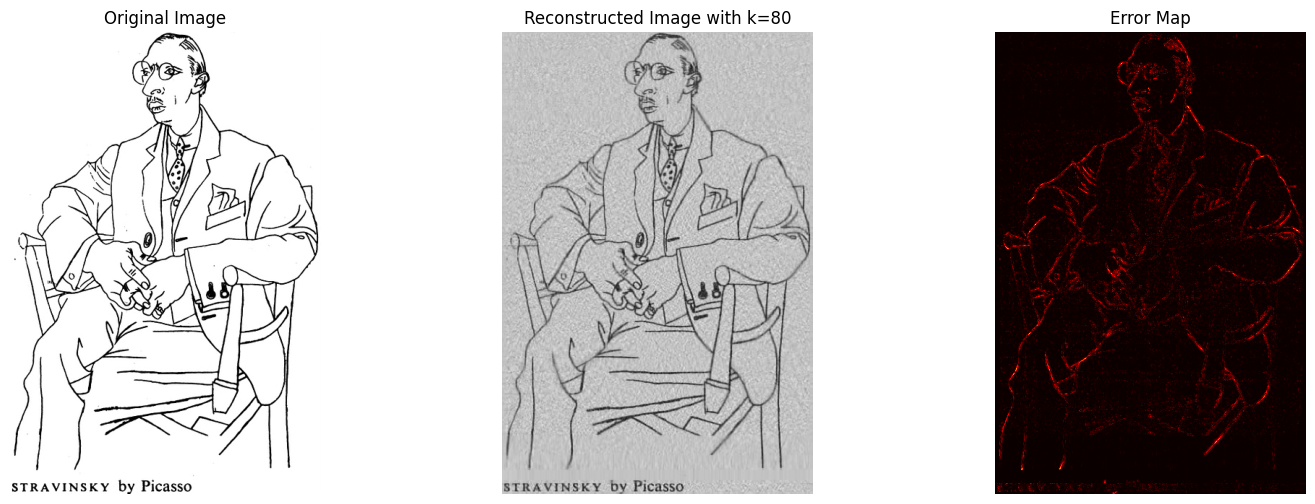

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(reconstructed_image, cmap='gray')
axes[1].set_title(f'Reconstructed Image with k={k}')
axes[1].axis('off')

axes[2].imshow(error_map, cmap='hot')
axes[2].set_title('Error Map')
axes[2].axis('off')

plt.show()

In [21]:
# 원본 이미지의 크기
original_size = image.nbytes

# 재구성에 사용된 데이터의 크기
compressed_size = U[:, :k].nbytes + s[:k].nbytes + Vt[:k, :].nbytes

compression_ratio = (compressed_size / original_size) * 100

print(f'압축률: {compression_ratio:.2f}%')

압축률: 249.07%


# [*연습문제 14-12]

>**Q. 왜 70이나 103이 아닌, K=80이었을까?**

>**A. 교재 : 그냥임 ㅋ**

오류 맵을 사용하여 적절한 계수 매개변수를 결정할 수 있는지 확인하는 것이 목표이다.

1. 1과 특잇값의 수 사이의 재구성 계수에 대한 for 반복문에서 낮은 계수 근사치를 생성하고 원본과 k 계수 근사치 사이의 프로베니우스 거리를 계산하여라.

2. 오차를 계수 함수로 표현하여라.(x축 : 재구성 계수, y축 : 원본과의 오차)

(오차는 확실히 계수가 증가함에 따라 감소하지만, 가장 좋은 계수는 명확하지 않음.)

In [22]:
errors = []
k_values = range(1, 201)

for k in k_values:
    reconstructed_image = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]
    error = np.linalg.norm(image - reconstructed_image, 'fro')
    errors.append(error)

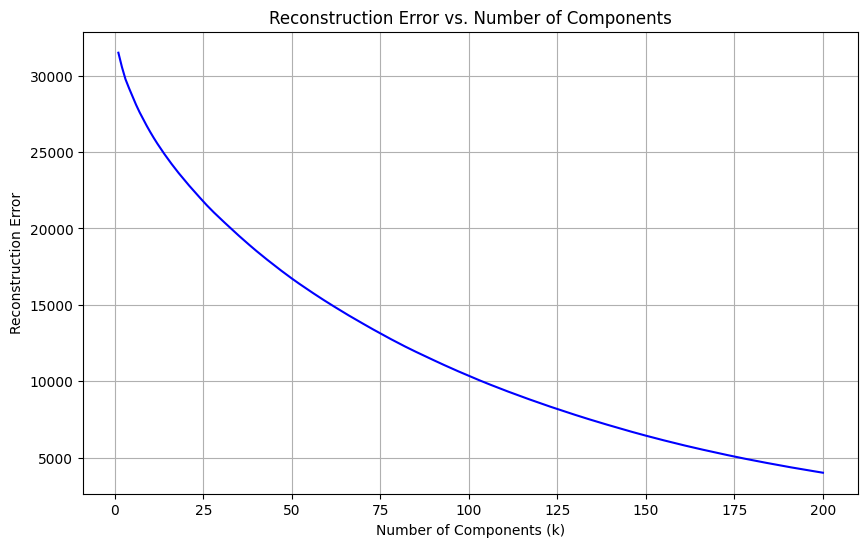

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, 'b-')
plt.xlabel('Number of Components (k)')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Number of Components')
plt.grid()
plt.show()

>**Q.k=430(전체 SVD)에 대한 재구성 오차는 정확히 0이어야 할까?**

>**A. 응 아니다.**

*이제 이부분을 스터디에서 설명해야겠죠? 협님....의 큰그림...*

> **[연습문제 14-10~12] 낮은 계수 근사치를 위한 SVD 문제들이었다.**

